# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>
### Exercise 07.1

#### Equilibration

The first part of exercise consists in equilibrating the system: below are shown the graphs of the Potential Energy per particle ($U/N$) and of the Pressure ($P$) in the three thermodynamical states given, which are the same as **Exercise 06**: 
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$). 

All the quantities equilibrate within 1000 steps, with the Potential Energy in the case of the gas being the slowest one. 

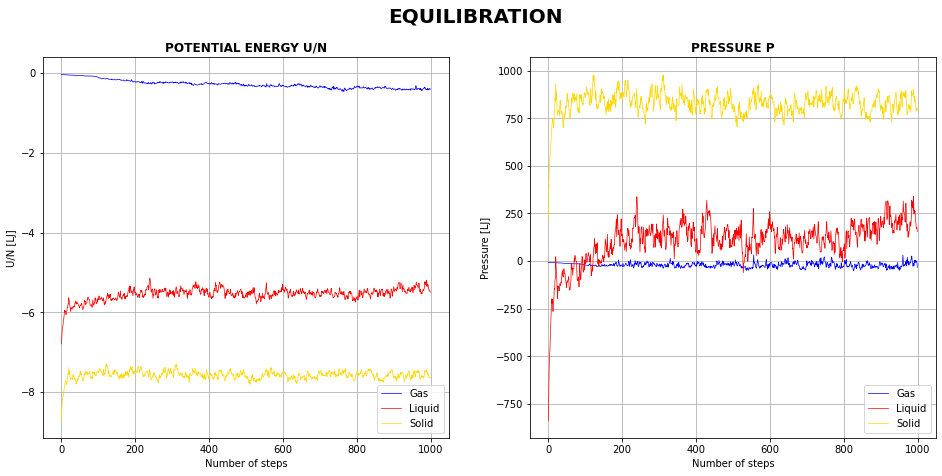

In [171]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(16,7))
fig.suptitle('EQUILIBRATION', fontweight = 'bold', fontsize = 20)
plt.subplot(121)

ypot_gas,ypres_gas=np.loadtxt("InstantValues_gas.out", usecols=(0, 1), max_rows=1000, unpack=True)
ypot_liq,ypres_liq=np.loadtxt("InstantValues_liquid.out", usecols=(0, 1), max_rows=1000, unpack=True)
ypot_sol,ypres_sol=np.loadtxt("InstantValues_solid.out", usecols=(0, 1), max_rows=1000, unpack=True)

xpot_gas=range(ypot_gas.size)
xpot_liq=range(ypot_liq.size)
xpot_sol=range(ypot_sol.size)
plt.xlabel('Number of steps')
plt.ylabel('U/N [LJ]')
plt.title("POTENTIAL ENERGY U/N", fontweight = 'bold')
plt.plot(xpot_gas, ypot_gas, color= "blue", linewidth=0.7, label="Gas")
plt.plot(xpot_liq, ypot_liq, color= "red", linewidth=0.7, label="Liquid")
plt.plot(xpot_sol, ypot_sol, color= "gold", linewidth=0.7, label="Solid")
plt.grid(True)
plt.legend()


plt.subplot(122)
xpres_gas=range(ypres_gas.size)
xpres_liq=range(ypres_liq.size)
xpres_sol=range(ypres_sol.size)
plt.xlabel('Number of steps')
plt.ylabel('Pressure [LJ]')
plt.title("PRESSURE P", fontweight = 'bold')
plt.plot(xpres_gas, ypres_gas, color= "blue", linewidth=0.7, label="Gas")
plt.plot(xpres_liq, ypres_liq, color= "red", linewidth=0.7, label="Liquid")
plt.plot(xpres_sol, ypres_sol, color= "gold", linewidth=0.7, label="Solid")
plt.grid(True)
plt.legend()

plt.show()

#### Autocorrelation

Starting from the instantaneous values of $U/N$ and $P$ of the equilibrated system, the autocorrelation function $$A(\tau) \equiv \frac{\langle x(t)x(t+\tau)\rangle - \langle x \rangle ^2}{\sigma^2_x}$$ was calculated with $\tau$ ranging from 0 to 1000. The results are graphed below, and the autocorrelation goes below 10% after ~50 steps in all cases other than $U/N$ for the gas, which is quite strongly autocorrelated even after 1000 steps. 

*Suggestion: The calcutation of the autocorrelation is quite heavy. It takes at least 30 mins to run for all three states if $\tau$ ranges from 0 to 1000. To set the upper limit, change* **time_diff** *in the code below*

In [147]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

steps = 5*10**5-1000

ypot,ypres=np.loadtxt("InstantValues_solid.out", usecols=(0, 1), skiprows=1000, max_rows=500000, unpack=True)


def correlation(i, x): #defining the function correlation
    appo=0
    sum=0
    sum2=0
    for j in range(0,steps-i):
        appo+=x[j]*x[j+i]
        sum+=x[j]
        sum2+=x[j]**2
    appo/=(steps-i)
    sum/=(steps-i)
    sum2/=(steps-i)
    return (appo-sum**2)/(sum2-sum**2)

time_diff=1000
Auto_pot=np.zeros(time_diff)
Auto_pres=np.zeros(time_diff)
for i in range(time_diff):  #calculating the autocorrelation from 0 to time_diff
    Auto_pot[i]=correlation(i,ypot)
    Auto_pres[i]=correlation(i,ypres)
    if (i+1)%10 == 0:
        print("Still running... at ", i+1, "/", time_diff)

print("Done!")    

Still running... at  10 / 1000
Still running... at  20 / 1000
Still running... at  30 / 1000
Still running... at  40 / 1000
Still running... at  50 / 1000
Still running... at  60 / 1000
Still running... at  70 / 1000
Still running... at  80 / 1000
Still running... at  90 / 1000
Still running... at  100 / 1000
Still running... at  110 / 1000
Still running... at  120 / 1000
Still running... at  130 / 1000
Still running... at  140 / 1000
Still running... at  150 / 1000
Still running... at  160 / 1000
Still running... at  170 / 1000
Still running... at  180 / 1000
Still running... at  190 / 1000
Still running... at  200 / 1000
Still running... at  210 / 1000
Still running... at  220 / 1000
Still running... at  230 / 1000
Still running... at  240 / 1000
Still running... at  250 / 1000
Still running... at  260 / 1000
Still running... at  270 / 1000
Still running... at  280 / 1000
Still running... at  290 / 1000
Still running... at  300 / 1000
Still running... at  310 / 1000
Still running... 

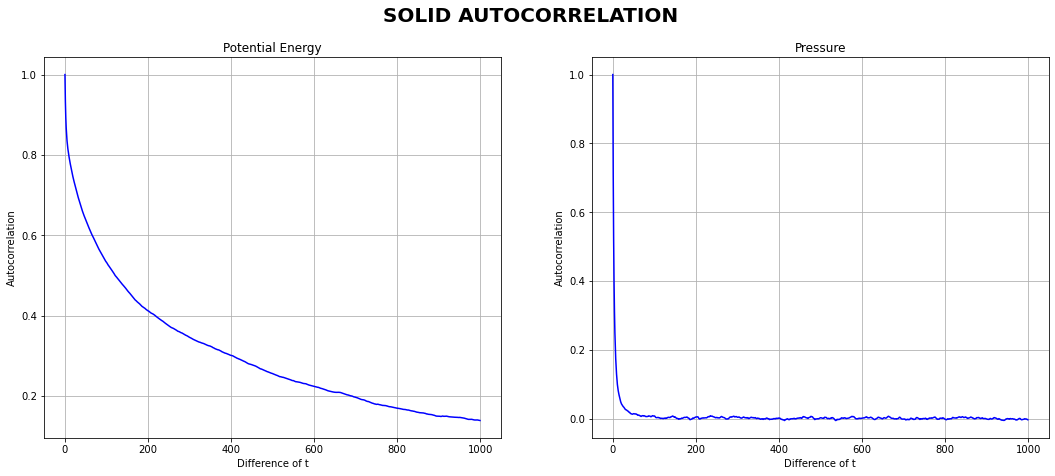

In [175]:
fig=plt.figure(figsize=(18,7))

fig.suptitle('SOLID AUTOCORRELATION', fontweight = 'bold', fontsize = 20)

plt.subplot(121)
x=np.arange(time_diff)
plt.plot(x,Auto_pot, color = 'b')
plt.title ("Potential Energy")
plt.xlabel('Difference of t')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Auto_pres, color = 'b')
plt.title ("Pressure")
plt.xlabel('Difference of t')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.show()

In [150]:
ypot,ypres=np.loadtxt("InstantValues_liquid.out", usecols=(0, 1), skiprows=1000, max_rows=500000, unpack=True)

time_diff=1000
Auto_pot=np.zeros(time_diff)
Auto_pres=np.zeros(time_diff)
for i in range(time_diff):
    Auto_pot[i]=correlation(i,ypot)
    Auto_pres[i]=correlation(i,ypres)
    if (i+1)%10 == 0:
        print("Still running... at ", i+1, "/", time_diff)
print("Done!")    

Still running... at  10 / 1000
Still running... at  20 / 1000
Still running... at  30 / 1000
Still running... at  40 / 1000
Still running... at  50 / 1000
Still running... at  60 / 1000
Still running... at  70 / 1000
Still running... at  80 / 1000
Still running... at  90 / 1000
Still running... at  100 / 1000
Still running... at  110 / 1000
Still running... at  120 / 1000
Still running... at  130 / 1000
Still running... at  140 / 1000
Still running... at  150 / 1000
Still running... at  160 / 1000
Still running... at  170 / 1000
Still running... at  180 / 1000
Still running... at  190 / 1000
Still running... at  200 / 1000
Still running... at  210 / 1000
Still running... at  220 / 1000
Still running... at  230 / 1000
Still running... at  240 / 1000
Still running... at  250 / 1000
Still running... at  260 / 1000
Still running... at  270 / 1000
Still running... at  280 / 1000
Still running... at  290 / 1000
Still running... at  300 / 1000
Still running... at  310 / 1000
Still running... 

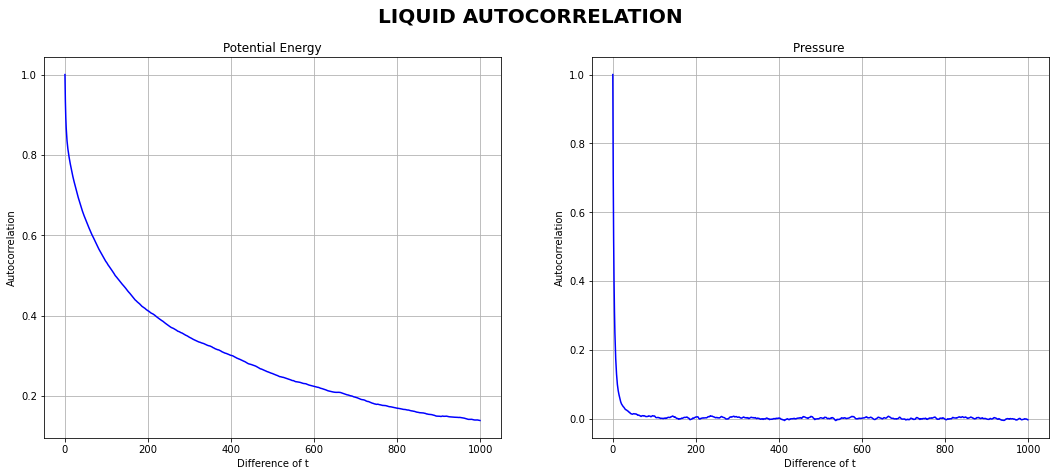

In [174]:
fig=plt.figure(figsize=(18,7))

fig.suptitle('LIQUID AUTOCORRELATION', fontweight = 'bold', fontsize = 20)

plt.subplot(121)
plt.plot(x,Auto_pot, color = 'b')
plt.title ("Potential Energy")
plt.xlabel('Difference of t')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Auto_pres, color = 'b')
plt.title ("Pressure ")
plt.xlabel('Difference of t')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.show()

In [160]:
ypot,ypres=np.loadtxt("InstantValues_gas.out", usecols=(0, 1), skiprows=1000, max_rows=500000, unpack=True)

time_diff=1000
Auto_pot=np.zeros(time_diff)
Auto_pres=np.zeros(time_diff)
for i in range(time_diff):
    Auto_pot[i]=correlation(i,ypot)
    Auto_pres[i]=correlation(i,ypres)
    if (i+1)%10 == 0:
        print("Still running... at ", i+1, "/", time_diff)
print("Done!")    

Still running... at  10 / 1000
Still running... at  20 / 1000
Still running... at  30 / 1000
Still running... at  40 / 1000
Still running... at  50 / 1000
Still running... at  60 / 1000
Still running... at  70 / 1000
Still running... at  80 / 1000
Still running... at  90 / 1000
Still running... at  100 / 1000
Still running... at  110 / 1000
Still running... at  120 / 1000
Still running... at  130 / 1000
Still running... at  140 / 1000
Still running... at  150 / 1000
Still running... at  160 / 1000
Still running... at  170 / 1000
Still running... at  180 / 1000
Still running... at  190 / 1000
Still running... at  200 / 1000
Still running... at  210 / 1000
Still running... at  220 / 1000
Still running... at  230 / 1000
Still running... at  240 / 1000
Still running... at  250 / 1000
Still running... at  260 / 1000
Still running... at  270 / 1000
Still running... at  280 / 1000
Still running... at  290 / 1000
Still running... at  300 / 1000
Still running... at  310 / 1000
Still running... 

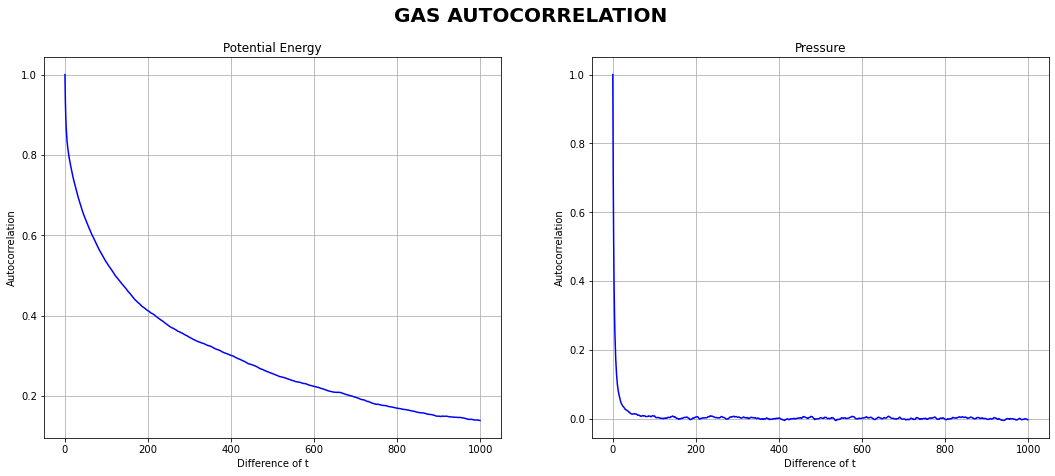

In [173]:
fig=plt.figure(figsize=(18,7))
fig.suptitle('GAS AUTOCORRELATION', fontweight = 'bold', fontsize = 20)

plt.subplot(121)
plt.plot(x,Auto_pot, color = 'b')
plt.title ("Potential Energy")
plt.xlabel('Difference of t')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.subplot(122)
plt.plot(x,Auto_pres, color = 'b')
plt.title ("Pressure")
plt.xlabel('Difference of t')
plt.ylabel('Autocorrelation')
plt.grid(True)

plt.show()

#### Uncertainties

The uncertainties of $U/N$ and $P$ have been computed for different block sizes. The block sizes were chosen amongst the dividers of $5\times10^3$, and specifically 1, 5, 10, 50, 100, 250, 500, 1000, 2500, 5000. For low values of the block size the uncertainty is lower than it should be, because of the autocorrelation. For block sizes larger than ~250 the uncertainty is somewhat stable, with fluctuations which don't change the order of magnitude of the uncertainty.

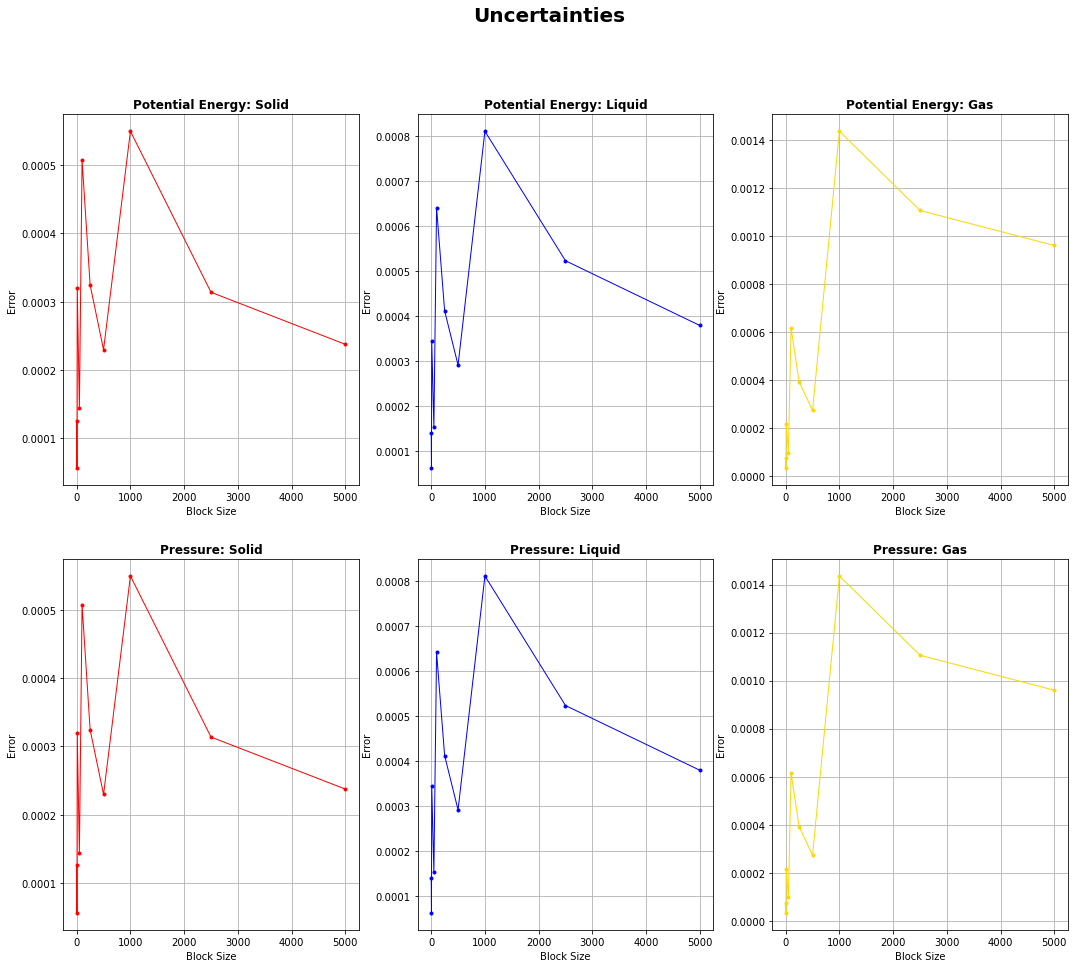

In [98]:
import math

def Error (A, A2, N):
    return math.sqrt((A2/N-(A/N)**2)/(N-1))

ypot,ypres=np.loadtxt("InstantValues_solid.out", usecols=(0, 1), skiprows=1000, max_rows=500000, unpack=True)

datapoints = 500000
uncertainty_pot = []
uncertainty_pres = []
blocksize = []
appo1, appo2, sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
for i in range (0, 4):
    B = 10**i
    blocksize.append(B)
    N=datapoints/B
    for j in range (0,int(N)):
        for k in range(0, 10**i):
            appo1 += ypot[k+j*B]
            appo2 += ypres[k+j*B]
        sum1pot += appo1/(B)
        sum2pot += (appo1/(B))**2
        sum1pres += appo2/(B)
        sum2pres += (appo2/(B))**2

        appo1, appo2 = 0.0, 0.0
    uncertainty_pot.append(Error(sum1pot, sum2pot, N))
    uncertainty_pres.append(Error(sum1pres, sum2pres, N))
    sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0
    if i>=2:
        B = 25*10**(i-1)
        blocksize.append(B)
        N=datapoints/B
        for j in range (0,int(N)):
            for k in range(0, 10**i):
                appo1 += ypot[k+j*B]
                appo2 += ypres[k+j*B]
            sum1pot += appo1/(B)
            sum2pot += (appo1/(B))**2
            sum1pres += appo2/(B)
            sum2pres += (appo2/(B))**2

            appo1, appo2 = 0.0, 0.0
        uncertainty_pot.append(Error(sum1pot, sum2pot, N))
        uncertainty_pres.append(Error(sum1pres, sum2pres, N))
        sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0

    B = 5*10**i
    blocksize.append(B)
    N=datapoints/B
    for j in range (0,int(N)):
        for k in range(0, 10**i):
            appo1 += ypot[k+j*B]
            appo2 += ypres[k+j*B]
        sum1pot += appo1/(B)
        sum2pot += (appo1/(B))**2
        sum1pres += appo2/(B)
        sum2pres += (appo2/(B))**2

        appo1, appo2 = 0.0, 0.0
    uncertainty_pot.append(Error(sum1pot, sum2pot, N))
    uncertainty_pres.append(Error(sum1pres, sum2pres, N))
    sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0

    
fig=plt.figure(figsize=(18,15))
fig.suptitle('Uncertainties', fontsize=20, fontweight="bold")

plt.subplot(231)
plt.title("Potential Energy: Solid", fontweight="bold")
plt.plot(blocksize, uncertainty_pot, color= "red", linewidth=1, marker=".")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.grid(True)

plt.subplot(234)
plt.title("Pressure: Solid", fontweight="bold")
plt.plot(blocksize, uncertainty_pot, color= "red", linewidth=1, marker=".")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.grid(True)


ypot,ypres=np.loadtxt("InstantValues_liquid.out", usecols=(0, 1), skiprows=1000, max_rows=500000, unpack=True)

datapoints = 500000
uncertainty_pot = []
uncertainty_pres = []
blocksize = []
appo1, appo2, sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
for i in range (0, 4):
    B = 10**i
    blocksize.append(B)
    N=datapoints/B
    for j in range (0,int(N)):
        for k in range(0, 10**i):
            appo1 += ypot[k+j*B]
            appo2 += ypres[k+j*B]
        sum1pot += appo1/(B)
        sum2pot += (appo1/(B))**2
        sum1pres += appo2/(B)
        sum2pres += (appo2/(B))**2

        appo1, appo2 = 0.0, 0.0
    uncertainty_pot.append(Error(sum1pot, sum2pot, N))
    uncertainty_pres.append(Error(sum1pres, sum2pres, N))
    sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0
    if i>=2:
        B = 25*10**(i-1)
        blocksize.append(B)
        N=datapoints/B
        for j in range (0,int(N)):
            for k in range(0, 10**i):
                appo1 += ypot[k+j*B]
                appo2 += ypres[k+j*B]
            sum1pot += appo1/(B)
            sum2pot += (appo1/(B))**2
            sum1pres += appo2/(B)
            sum2pres += (appo2/(B))**2

            appo1, appo2 = 0.0, 0.0
        uncertainty_pot.append(Error(sum1pot, sum2pot, N))
        uncertainty_pres.append(Error(sum1pres, sum2pres, N))
        sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0

    B = 5*10**i
    blocksize.append(B)
    N=datapoints/B
    for j in range (0,int(N)):
        for k in range(0, 10**i):
            appo1 += ypot[k+j*B]
            appo2 += ypres[k+j*B]
        sum1pot += appo1/(B)
        sum2pot += (appo1/(B))**2
        sum1pres += appo2/(B)
        sum2pres += (appo2/(B))**2

        appo1, appo2 = 0.0, 0.0
    uncertainty_pot.append(Error(sum1pot, sum2pot, N))
    uncertainty_pres.append(Error(sum1pres, sum2pres, N))
    sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0

    
plt.subplot(232)
plt.title("Potential Energy: Liquid", fontweight="bold")
plt.plot(blocksize, uncertainty_pot, color= "blue", linewidth=1, marker=".")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.grid(True)

plt.subplot(235)
plt.title("Pressure: Liquid", fontweight="bold")
plt.plot(blocksize, uncertainty_pot, color= "blue", linewidth=1, marker=".")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.grid(True)


ypot,ypres=np.loadtxt("InstantValues_gas.out", usecols=(0, 1), skiprows=1000, max_rows=500000, unpack=True)

datapoints = 499000
uncertainty_pot = []
uncertainty_pres = []
blocksize = []
appo1, appo2, sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
for i in range (0, 4):
    B = 10**i
    blocksize.append(B)
    N=datapoints/B
    for j in range (0,int(N)):
        for k in range(0, 10**i):
            appo1 += ypot[k+j*B]
            appo2 += ypres[k+j*B]
        sum1pot += appo1/(B)
        sum2pot += (appo1/(B))**2
        sum1pres += appo2/(B)
        sum2pres += (appo2/(B))**2

        appo1, appo2 = 0.0, 0.0
    uncertainty_pot.append(Error(sum1pot, sum2pot, N))
    uncertainty_pres.append(Error(sum1pres, sum2pres, N))
    sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0
    if i>=2:
        B = 25*10**(i-1)
        blocksize.append(B)
        N=datapoints/B
        for j in range (0,int(N)):
            for k in range(0, 10**i):
                appo1 += ypot[k+j*B]
                appo2 += ypres[k+j*B]
            sum1pot += appo1/(B)
            sum2pot += (appo1/(B))**2
            sum1pres += appo2/(B)
            sum2pres += (appo2/(B))**2

            appo1, appo2 = 0.0, 0.0
        uncertainty_pot.append(Error(sum1pot, sum2pot, N))
        uncertainty_pres.append(Error(sum1pres, sum2pres, N))
        sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0

    B = 5*10**i
    blocksize.append(B)
    N=datapoints/B
    for j in range (0,int(N)):
        for k in range(0, 10**i):
            appo1 += ypot[k+j*B]
            appo2 += ypres[k+j*B]
        sum1pot += appo1/(B)
        sum2pot += (appo1/(B))**2
        sum1pres += appo2/(B)
        sum2pres += (appo2/(B))**2

        appo1, appo2 = 0.0, 0.0
    uncertainty_pot.append(Error(sum1pot, sum2pot, N))
    uncertainty_pres.append(Error(sum1pres, sum2pres, N))
    sum1pot, sum2pot, sum1pres, sum2pres = 0.0, 0.0, 0.0, 0.0

    
plt.subplot(233)
plt.title("Potential Energy: Gas", fontweight="bold")
plt.plot(blocksize, uncertainty_pot, color= "gold", linewidth=1, marker=".")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.grid(True)

plt.subplot(236)
plt.title("Pressure: Gas", fontweight="bold")
plt.plot(blocksize, uncertainty_pot, color= "gold", linewidth=1, marker=".")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.grid(True)



### Exercise 07.2 & 07.3 & 07.4

The second exercise required the improvement of the given MONTECARLO_NVT code by adding the possibility to calculate the radial distribution function $g(r)$ as a function of $r$. The result is shown for all the three cases (gas, liquid and solid).
The third exercise asked to do the same to the code from **Exercise 4**, also shown below. 
The two are shown side by side. The $g(r)$ of the gas simulation peaks at around 1 radius, and flattens out to an almost constant probability quite quickly. This is because in the gas the particles don't form a structure like they do in the liquid and even more in the solid state. This is evident from the $g(r)$ of the other two states, with marked higher and lower probabilities at certain distances for the solid (like one would expect from a solid structure) and an in between $g(r)$ for the liquid, because the tendency to form a structure is still contrasted by the higher temperature.

Lastly in the fourth one the three simulations for the three states are run, and the values obtained for the Potential energy $U/N$ and the Pressure $P$ are shown in the graphs at the bottom. 
Then the two $g(r)$ of the NVT and NVE simulations are compared. To do so I had to divide by 5000 the results from the code of  **Exercise 4**, because it seems they weren't properly normalised. I wasn't able to find the problem, since the code regarding the $g(r)$ is identical to the one used in **Exercise 7**. The difference between the two $g(r)$ (assuming that I rescaled the second one properly) seems to be minimal.


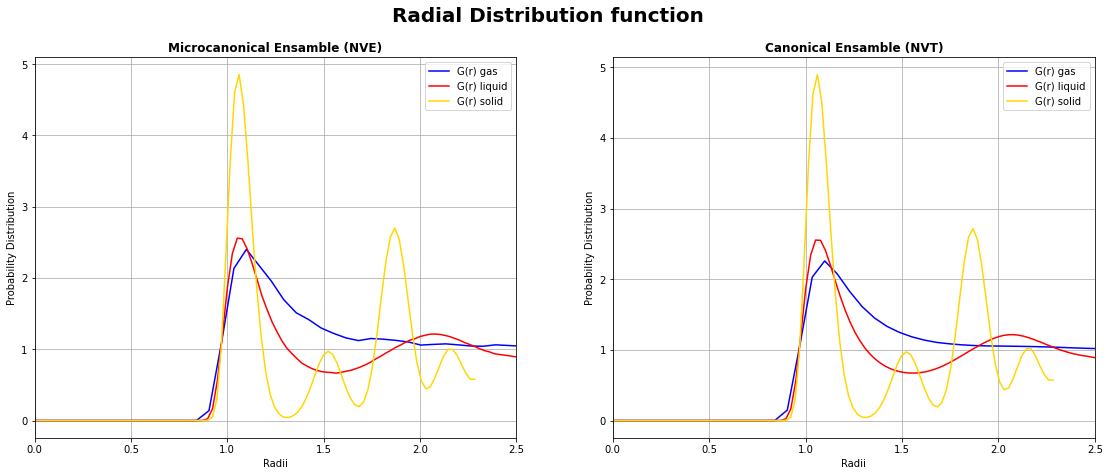

In [163]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(19,7))
fig.suptitle("Radial Distribution function", fontweight = "bold", fontsize = 20)

plt.subplot(121)

xg1,yg1=np.loadtxt("../Molecular Dynamics/output.gas.gave.0",  usecols = (0,1), skiprows = 800, unpack=True)
plt.xlabel("Radii")
plt.ylabel("Probability Distribution")
plt.plot(xg1, yg1/5000, label="G(r) gas", color = "b")
xl1,yl1=np.loadtxt("../Molecular Dynamics/output.liquid.gave.0",  usecols = (0,1), skiprows = 800, unpack=True)
plt.plot(xl1, yl1/5000, label="G(r) liquid", color = "r")
xs1,ys1=np.loadtxt("../Molecular Dynamics/output.solid.gave.0",  usecols = (0,1), skiprows = 800, unpack=True)
plt.title("Microcanonical Ensamble (NVE)", fontweight="bold")
plt.plot(xs1, ys1/5000, label="G(r) solid", color = "gold")
plt.xlim(0,2.5)
plt.grid(True)
plt.legend()

plt.subplot(122)

xg2,yg2=np.loadtxt("output.gas.gave.0",  usecols = (0,1), unpack=True)
plt.title("Canonical Ensamble (NVT)", fontweight="bold")
plt.xlabel("Radii")
plt.ylabel("Probability Distribution")
plt.plot(xg2, yg2, label="G(r) gas", color = "b")
xl2,yl2=np.loadtxt("output.liquid.gave.0",  usecols = (0,1), unpack=True)
plt.plot(xl2, yl2, label="G(r) liquid", color = "r")
xs2,ys2=np.loadtxt("output.solid.gave.0",  usecols = (0,1), unpack=True)
plt.plot(xs2, ys2, label="G(r) solid", color = "gold")
plt.xlim(0,2.5)
plt.grid(True)
plt.legend()


plt.show()

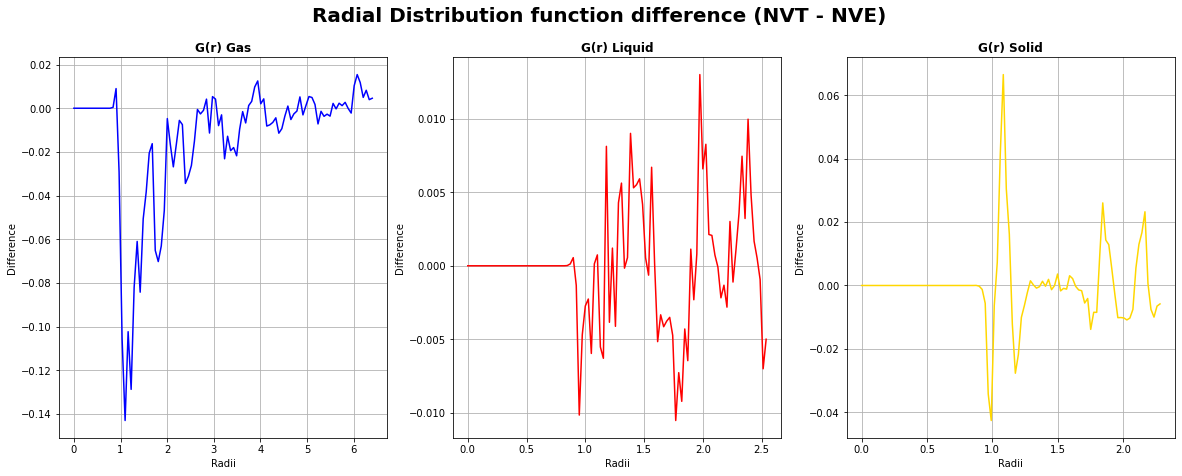

In [189]:
fig=plt.figure(figsize=(20,7))
fig.suptitle("Radial Distribution function difference (NVT - NVE)", fontweight = "bold", fontsize = 20)
plt.subplot(131)

plt.title("G(r) Gas", fontweight="bold")
plt.xlabel("Radii")
plt.ylabel("Difference")
plt.plot(xg2, yg2-yg1/5000, color = "b")
plt.grid(True)

plt.subplot(132)


plt.title("G(r) Liquid", fontweight="bold")
plt.xlabel("Radii")
plt.ylabel("Difference")
plt.plot(xl2, yl2-yl1/5000, color = "r")
plt.grid(True)

plt.subplot(133)

plt.title("G(r) Solid", fontweight="bold")
plt.xlabel("Radii")
plt.ylabel("Difference")
plt.plot(xs2, ys2-ys1/5000, color = "gold")
plt.grid(True)

plt.show()

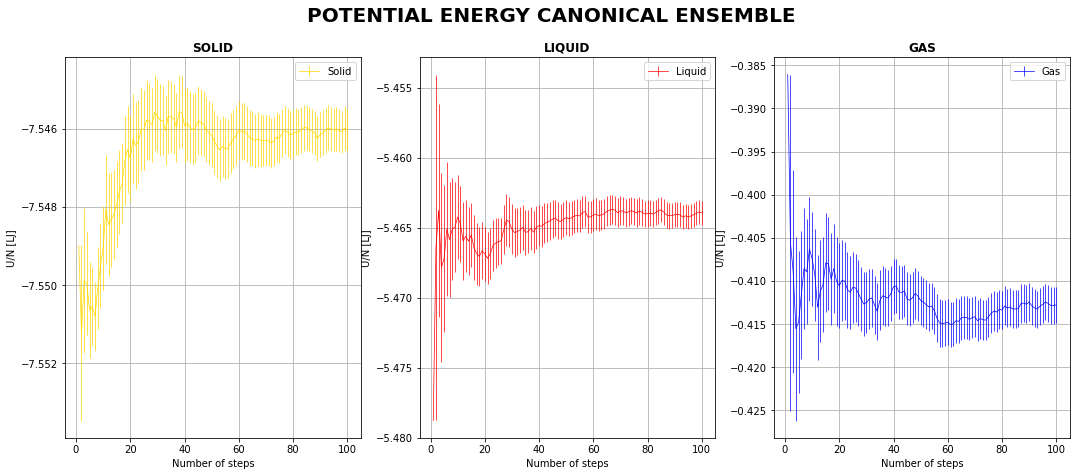

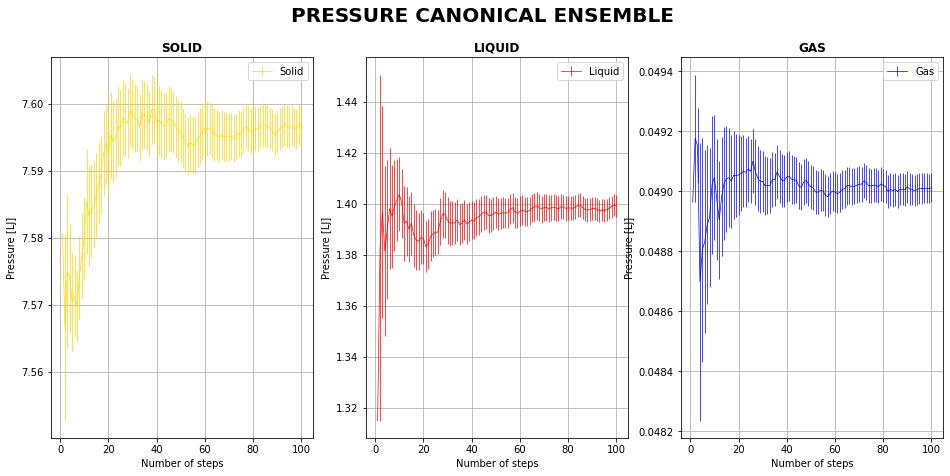

In [188]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

fig=plt.figure(figsize=(18,7))
fig.suptitle('POTENTIAL ENERGY CANONICAL ENSEMBLE', fontweight = 'bold', fontsize = 20)
plt.subplot(131)

xpot_gas,ypot_gas,ypgerr=np.loadtxt("output.gas.epot.0", usecols=(0, 2,3), unpack=True)
xpot_liq,ypot_liq, yplerr=np.loadtxt("output.liquid.epot.0", usecols=(0, 2,3), unpack=True)
xpot_sol,ypot_sol,ypserr=np.loadtxt("output.solid.epot.0", usecols=(0, 2,3), unpack=True)

plt.xlabel('Number of steps')
plt.ylabel('U/N [LJ]')
plt.title("SOLID", fontweight = 'bold')
plt.errorbar(xpot_sol, ypot_sol, ypserr, color= "gold", linewidth=0.7, label="Solid")
plt.grid(True)
plt.legend()

plt.subplot(132)


plt.xlabel('Number of steps')
plt.ylabel('U/N [LJ]')
plt.title("LIQUID", fontweight = 'bold')
plt.errorbar(xpot_liq, ypot_liq, yplerr, color= "red", linewidth=0.7, label="Liquid")
plt.grid(True)
plt.legend()

plt.subplot(133)

plt.xlabel('Number of steps')
plt.ylabel('U/N [LJ]')
plt.title("GAS", fontweight = 'bold')
plt.errorbar(xpot_gas, ypot_gas, ypgerr, color= "blue", linewidth=0.7, label="Gas")
plt.grid(True)
plt.legend()

plt.show()

xpres_gas,ypres_gas,ypgerr=np.loadtxt("output.gas.pres.0", usecols=(0, 2,3), unpack=True)
xpres_liq,ypres_liq, yplerr=np.loadtxt("output.liquid.pres.0", usecols=(0, 2,3), unpack=True)
xpres_sol,ypres_sol,ypserr=np.loadtxt("output.solid.pres.0", usecols=(0, 2,3), unpack=True)

fig=plt.figure(figsize=(16,7))
fig.suptitle('PRESSURE CANONICAL ENSEMBLE', fontweight = 'bold', fontsize = 20)

plt.subplot(131)

plt.xlabel('Number of steps')
plt.ylabel('Pressure [LJ]')
plt.title("SOLID", fontweight = 'bold')
plt.errorbar(xpres_sol, ypres_sol, ypserr, color= "gold", linewidth=0.7, label="Solid")
plt.grid(True)
plt.legend()

plt.subplot(132)

plt.xlabel('Number of steps')
plt.ylabel('Pressure [LJ]')
plt.title("LIQUID", fontweight = 'bold')
plt.errorbar(xpres_liq, ypres_liq, yplerr, color= "r", linewidth=0.7, label="Liquid")
plt.grid(True)
plt.legend()

plt.subplot(133)

plt.xlabel('Number of steps')
plt.ylabel('Pressure [LJ]')
plt.title("GAS", fontweight = 'bold')
plt.errorbar(xpres_gas, ypres_gas, ypgerr, color= "blue", linewidth=0.7, label="Gas")
plt.grid(True)
plt.legend()

plt.show()